# Машинное обучение 1, ПМИ ВШЭ

## Семинар 1. Разновидности данных и типы задач машинного обучения

На лекции мы обсуждали, что наиболее распространенными задачами машинного обучения являются классификация и регрессия. Но жизнь, как водится, богаче книги, и для каждого домена данных существует множество специфичных задач, которые с разной степенью успешности решаются специалистами в сфере МО.

In [1]:
# !pip install torchaudio >> /dev/null

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 18})
sns.set_style('whitegrid')

## Синтетические/геометрические данные

- Мы точно знаем все зависимости между целевой переменной и признаками, посколько задаем их сами
- Хорошо подходят для визуализации работы алгоритмов

**Внимание!** Образец хорошего оформления графика.

C:\Users\Egor\AppData\Local\Temp\ipykernel_21116\2395548434.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  axs[1].figure.colorbar(sm, label='target')


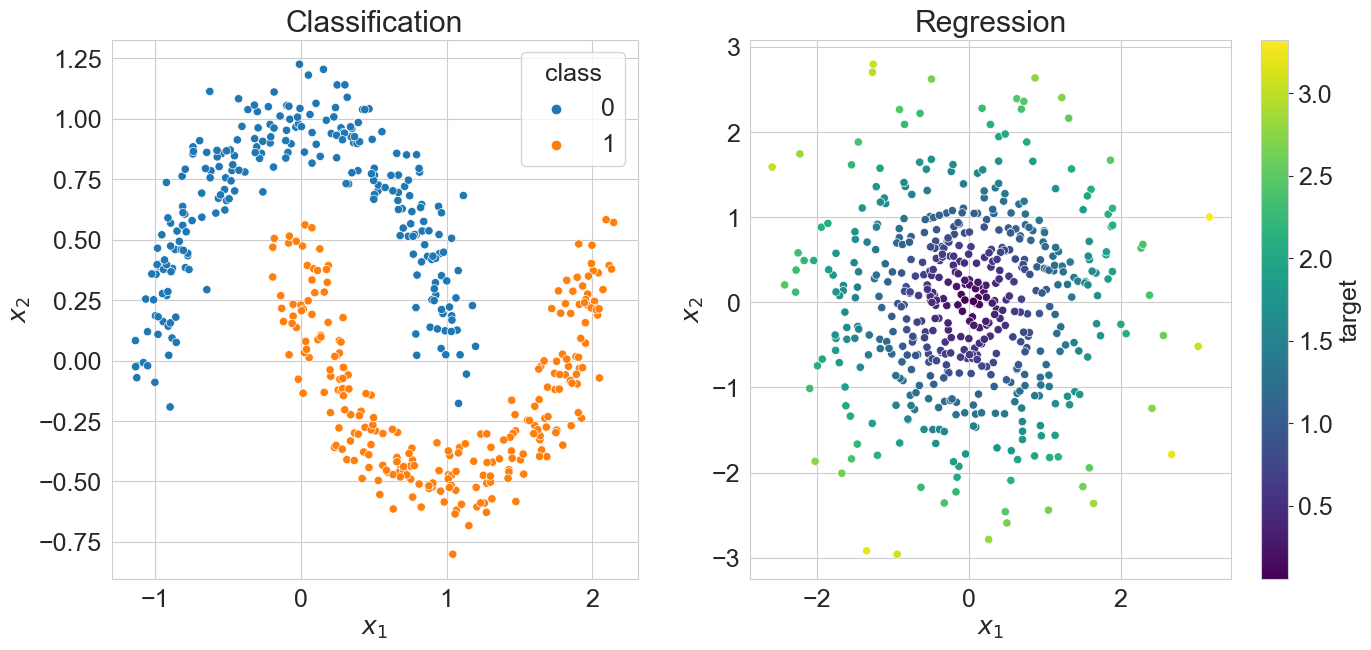

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.1, random_state=0)
fig, axs = plt.subplots(figsize=(16, 7), nrows=1, ncols=2, gridspec_kw={'width_ratios': [1.75, 2]})
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axs[0])

X = np.random.randn(500, 2)
y = np.sqrt((X ** 2).sum(axis=1))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axs[1], palette='viridis')

axs[0].legend(title='class')
axs[0].set_title('Classification')

norm = plt.Normalize(y.min(), y.max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

axs[1].get_legend().remove()
axs[1].figure.colorbar(sm, label='target')
axs[1].set_title('Regression')

for ax in axs:
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

plt.show()

Примеры кластеризации на синтетических данных: https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png

## Табличные данные

Конечно, мы могли бы взять любые данные и представить их в качестве таблицы, но здесь речь идет о канонически табличных данных, когда все признаки имеют разную природу и в каком-то смысле являются отдельными, "осмысленными" измерениями. 
- Это один из самых распространненых типов данных, и в курсе МО-1 90% времени мы будем работать с таблицами
- Обычно признаки делятся на вещественные и категориальные.

Boston dataset: http://lib.stat.cmu.edu/datasets/boston

In [4]:
from sklearn.datasets import load_boston

X = load_boston()
X = pd.DataFrame(data=np.concatenate((X['data'], X['target'].reshape(-1, 1)), axis=1),
                 columns=list(X['feature_names']) + ['target'])
X

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


## Изображения

Направление машинного обучения, которое имеет дело с изображениями, называется компьютерным зрением (Computer Vision, CV). Как правило, изображения представляют в виде тензоров размерности $(H, W, C)$, где обычно $C = 3$. Содержание тензора зависит от цветового пространства, чаще всего используется RGB. 

In [5]:
# !wget -O image.jpg https://krasivosti.pro/uploads/posts/2021-06/1623727983_11-krasivosti_pro-p-milie-yezhiki-zhivotnie-krasivo-foto-11.jpg
import wget
wget.download('https://krasivosti.pro/uploads/posts/2021-06/1623727983_11-krasivosti_pro-p-milie-yezhiki-zhivotnie-krasivo-foto-11.jpg', 'image.jpg')

'image (1).jpg'

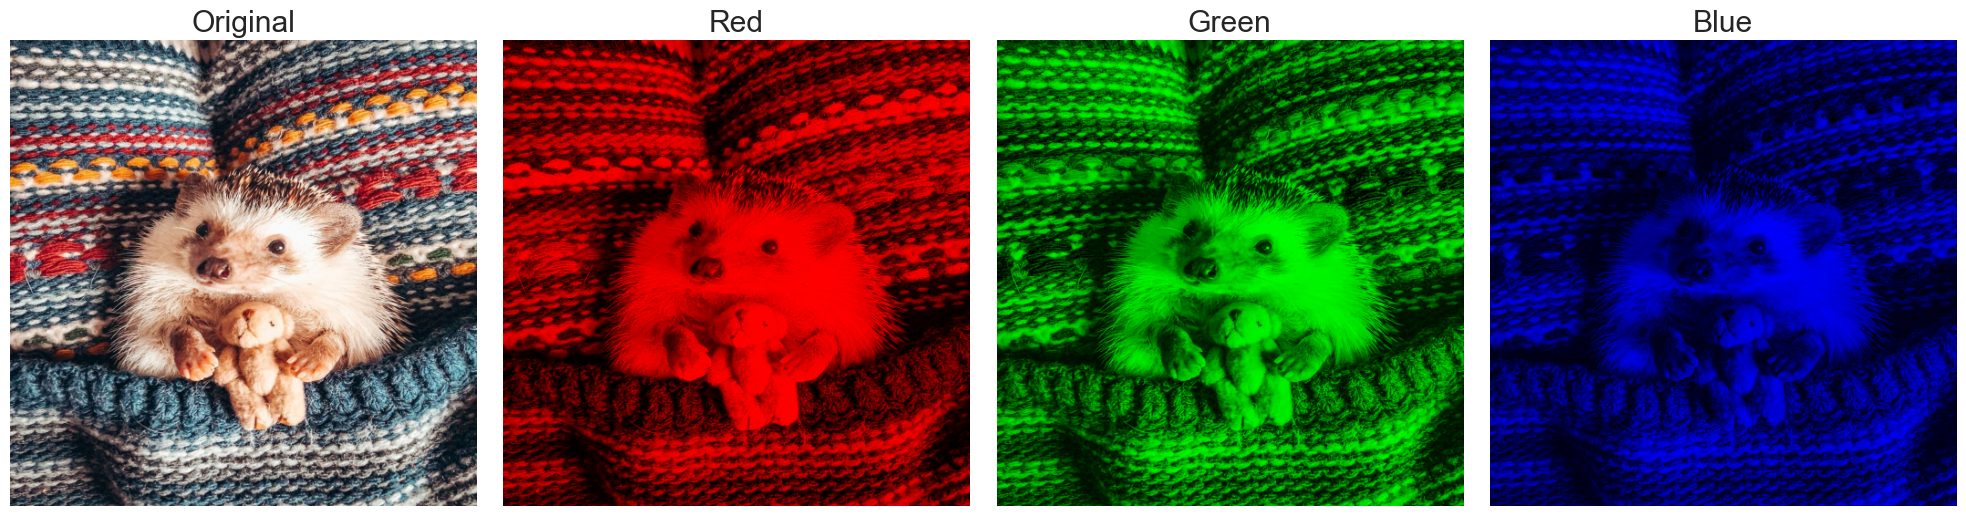

In [6]:
from skimage import io, color
from skimage.transform import resize

rgb_image = resize(io.imread('image.jpg'), (512, 512))
fix, axs = plt.subplots(figsize=(20, 6), nrows=1, ncols=4)
axs[0].imshow(rgb_image)

red_image = np.copy(rgb_image)
red_image[..., 1:] = 0.0
axs[1].imshow(red_image)

green_image = np.copy(rgb_image)
green_image[..., [0, 2]] = 0.0
axs[2].imshow(green_image)

blue_image = np.copy(rgb_image)
blue_image[..., :2] = 0.0
axs[3].imshow(blue_image)

for ax in axs:
    ax.grid(False)
    ax.axis('off')

for ax, title in zip(axs, ['Original', 'Red', 'Green', 'Blue']):
    ax.set_title(title)

plt.tight_layout()
plt.show()

Иногда используют и другие цветовые пространства, например, Lab (канал светлоты и два цветовых канала).

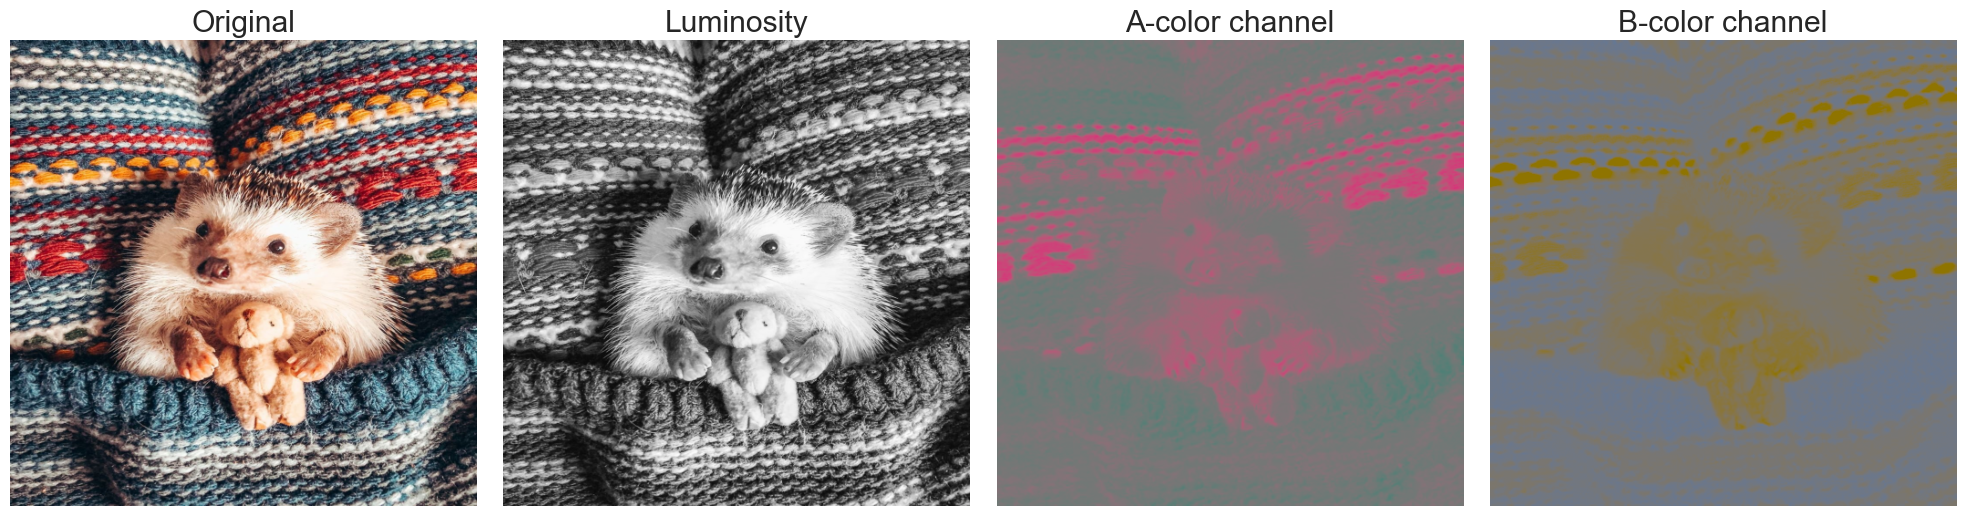

In [7]:
lab_image = color.rgb2lab(rgb_image)
fix, axs = plt.subplots(figsize=(20, 6), nrows=1, ncols=4)
axs[0].imshow(rgb_image)

l_image = np.copy(lab_image)
l_image[..., 1:] = 0.0
axs[1].imshow(color.lab2rgb(l_image))

a_image = np.copy(lab_image)
a_image[..., 0] = 50
a_image[..., 2] = 0
axs[2].imshow(color.lab2rgb(a_image))

b_image = np.copy(lab_image)
b_image[..., 0] = 50
b_image[..., 1] = 0
axs[3].imshow(color.lab2rgb(b_image))

for ax in axs:
    ax.grid(False)
    ax.axis('off')

for ax, title in zip(axs, ['Original', 'Luminosity', 'A-color channel', 'B-color channel']):
    ax.set_title(title)

plt.tight_layout()
plt.show()

### Задачи:

**Классификация (classification)** (ImageNet, CIFAR-10/100, MNIST)


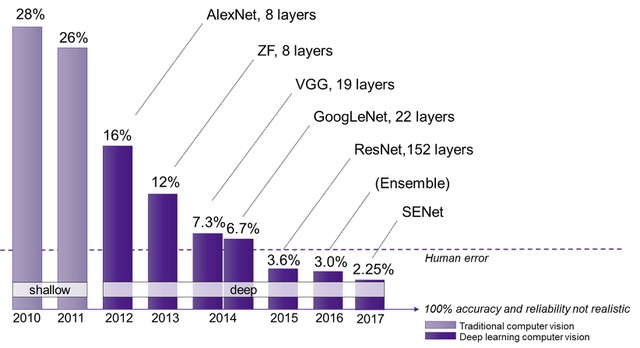

**Семантическая сегментация (semantic segmentation)** (PASCAL VOC, Cityscapes)


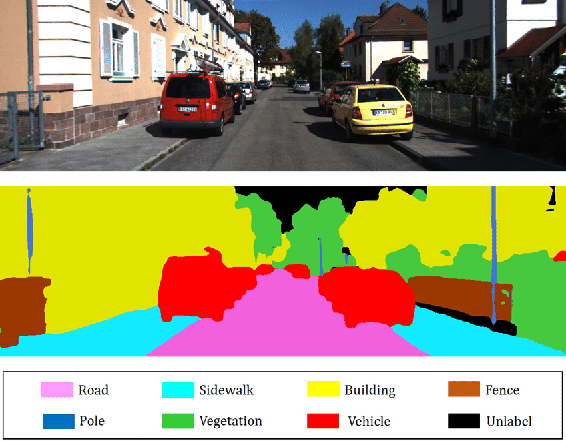

**Детекция объектов (object detection)** (COCO, PASCAL VOC)


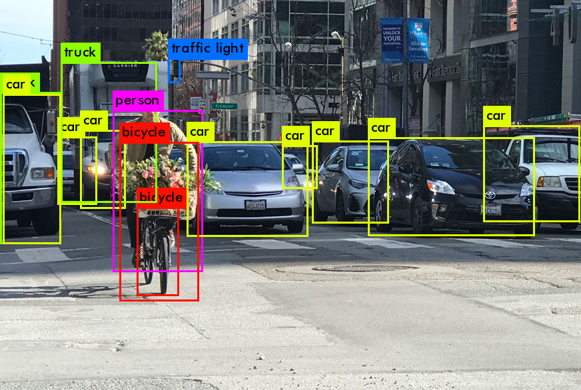

И многие-многие другие, такие как **оценка позы (pose estimation)**, **реконструкция сцены (scene reconstruction)** и т.д.

Также встречаются разного рода генеративные задачи, такие как **перенос стиля (style transfer)** или **повышение разрешения (super-resolution)**.


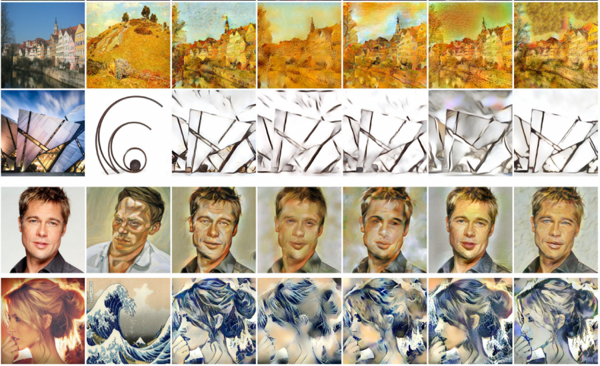

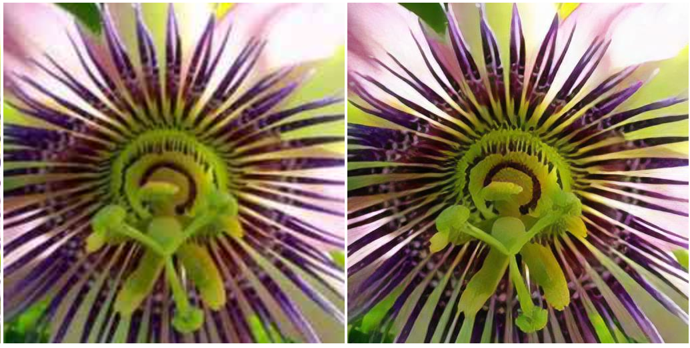

## Текстовые данные

Обработка естественного языка (Natural Language Processing, NLP) - одно из наиболее востребованных направлений в машинном обучении. Зачастую методы из NLP перекочевывают в другие домены данных и находят там успешное применение. Основными особенностями текстовых данных являются, во-первых, их дискретность, а во-вторых, последовательная структура. Как правило, при работе с текстом его токенизируют (по символам, по словам или по сочетаниям символов -- так называемый byte-pair-encoding, BPE), а затем каждому токену присваивается некоторый вектор-эмбеддинг. Такое преобразование позволяет обрабатывать дискретные данные непрерывными моделями.

В последнее время также развиваются инструменты работы с данными, которые похожи на тексты, но таковыми не являются. Например, появляются новые задачи и данные, связанные с обработкой программного кода. 

## Задачи:

- **Машинный перевод (machine translation)** (WMT, IWSLT)
- **Обобщение текста (text summarization)** (GigaWord, arXiv)
- **Моделирование языка (language modelling)** (WikiText)
- **Генерация текста (text generation)** (MATH, COCO Captions)
- **Ответы на вопросы (question answering)** (SQuAD, WikiQA)
- **Определение части речи (part-of-speech tagging, POS)** (Penn Treebank)
- **Анализ эмоциональной окраски (sentiment analysis)** (SST, IMDb, Yelp)


## Аудио

Аудиозаписи часто представляют как последовательность вещественных чисел из промежутка $[-1, 1]\,$ (wav-формат). Такие аудио могут быть как одноканальными, так и многоканальными. При работе с музыкой популярен MIDI-формат. Но наиболее часто встречаются спектрограммы -- результат применения к звуковой волне преобразования Фурье или его вариаций.

In [8]:
import librosa
import torch
import torchaudio
from IPython.display import Audio

waveform, sample_rate = librosa.load(librosa.example('trumpet'))
waveform = torch.from_numpy(waveform)
Audio(waveform, rate=sample_rate)

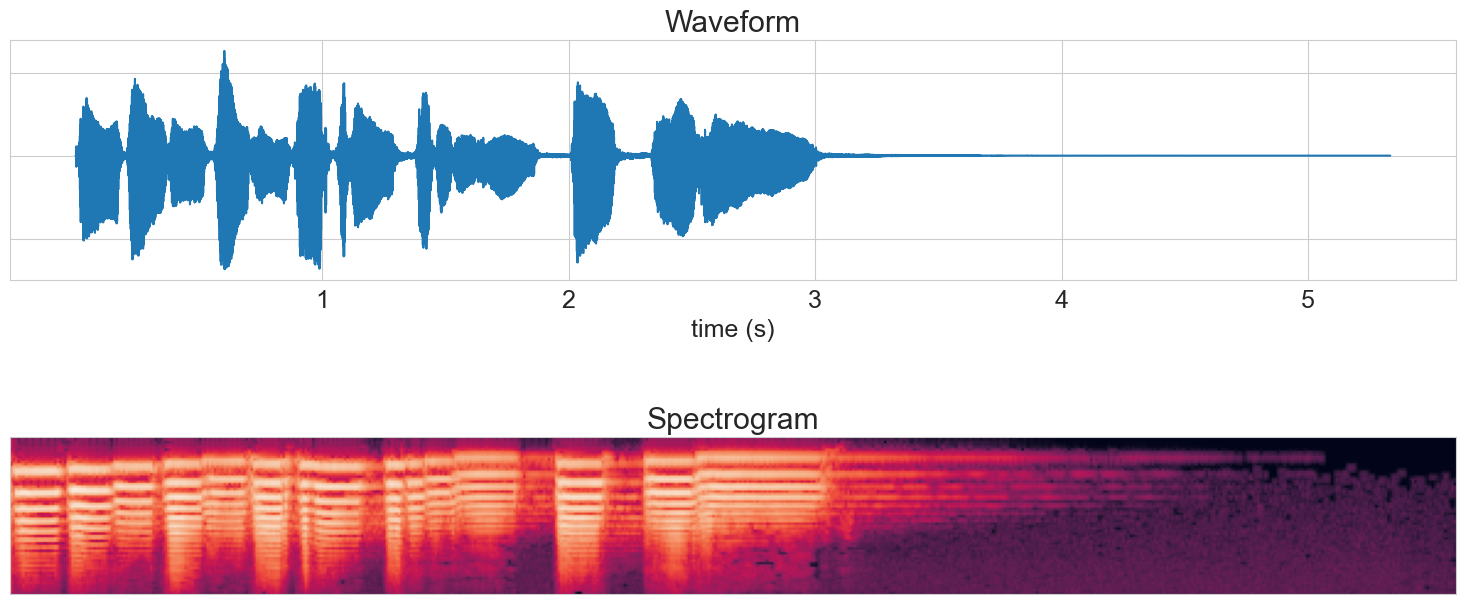

In [9]:
spectrogramer = torchaudio.transforms.MelSpectrogram(n_mels=64, sample_rate=sample_rate)
spec = spectrogramer(waveform.unsqueeze(0)).squeeze(0)

fig, axs = plt.subplots(figsize=(15, 8), nrows=2, ncols=1, gridspec_kw={'height_ratios': [1, 2]})
axs[0].plot(waveform)
axs[1].imshow(torch.log(spec + 1e-9))

pos = (np.arange(1, 6, 1) * sample_rate).astype(int)
axs[0].set_xticks(pos)
axs[0].xaxis.set_ticklabels([str(i) for i in range(1, 6)])
axs[0].yaxis.set_ticklabels([])
axs[0].set_xlabel('time (s)')
axs[0].set_title('Waveform')
axs[1].grid(False)
axs[1].xaxis.set_ticklabels([])
axs[1].yaxis.set_ticklabels([])
axs[1].set_title('Spectrogram')

plt.tight_layout()
plt.show()

### Задачи

- **Распознавание речи (automatic speech recognition, asr, speech-to-text)** (LJSpeech, LibriSpeech)
- **Синтез речи (text-to-speech, tts)**
- **Генерация музыки (music generation)**
- **Устранение шумов, улучшение речи (denoising, speech enhancement)**
- **Распознавание ключевых слов (keyword spotting, kws)**

## Видео

Работа с видео-файлами похожа на работу с изображениями: к 2 пространственным размерностям и размерности цветовых каналов добавляется время. Иногда в контексте видео рассматривают и звуковую дорожку. В целом, для видео актуальны все те же задачи, что и для изображений, с поправкой на наличие изменений сцены во времени. Среди специфичных задач можно упомянуть **optical flow** (отслеживание движения пикселей на кадрах) и **object tracking** (отслеживание движущихся объектов).



In [10]:
from IPython.display import Image
Image(url='https://nanonets.com/blog/content/images/2019/04/sparse-vs-dense.gif')

## Графовые данные

Иногда данные имеют явную или неявную графовую структуру (например, молекулы как графы атомов или профили в социальных сетях), и при обработке было бы полезно использовать это дополнительное знание. Задачи на графах можно разделить на два типа:

1. Задачи на уровне вершин (например, определение социальной роли)
2. Задачи на уровне графов (например, классификация молекул)

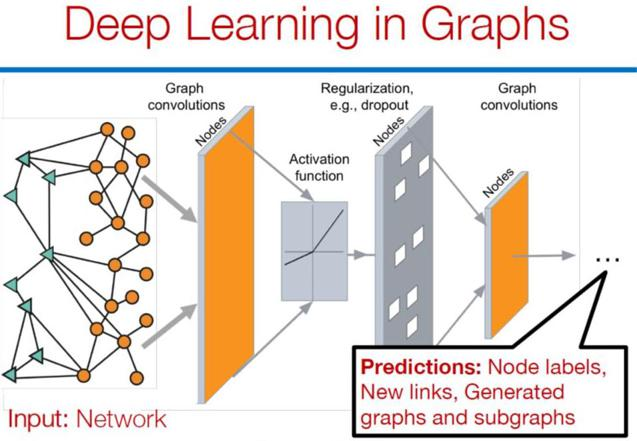

## Многодоменные задачи

Совершенствование моделей машинного обучения и рост вычислительных мощностей привели к появлению задач, затрагивающих несколько доменов данных. Вспомним задачи обработки звука: распознавание и синтез речи, по сути, представляют собой перевод из звукового домена в текстовый и обратно. Существуют примеры комбинирования текста и изображений: это Visual Question Answering (VQA) -- ответы на вопросы по изображению или text-to-image generation -- генерация изображения по текстовому запросу. Подобные задачи решаются с помощью очень больших и сложных моделей, а также требуют огромного числа данных и вычислительного бюджета. Здесь же можно вспомнить про беспилотники, которые так же обрабатывают данные очень разной природы.